# Set up

Python librairies imports :

In [55]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import math
import re

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(palette="Dark2")

import missingno as msno

import folium

Load data set from Google Drive :

In [2]:
work_loc = 'colab' # colab or local

project_path = "My Drive/OPENCLASSROOMS/Projets DATA/4. Consommation batiments"
csv_filename = "2016_Building_Energy_Benchmarking.csv"

if(work_loc == 'colab'):
    # Mount Drive folder
    from google.colab import drive
    drive.mount('/content/drive')

    # Google Drive path
    work_path = "/content/drive/"

elif(work_loc == 'local'):
    # Local drive path 
    work_path = "/Users/victor/Library/CloudStorage/GoogleDrive-vicozer@gmail.com/"

else:
    raise ValueError("Choose between 'colab' or 'local' work!")

# Get CSV file path 
csv_file = work_path + project_path + "/" + csv_filename

# Import csv file as dataframe
raw_data = pd.read_csv(csv_file)

Mounted at /content/drive


# Dataset analysis

### General information

In [3]:
print("Dataset info :")
display(raw_data.info())

print('\nDataframe shape :')
print(raw_data.shape)

print("\nDataframe types :")
print(raw_data.dtypes)

print("\nSample of the data set:")
display(raw_data.sample(5))

Dataset info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latit

None


Dataframe shape :
(3376, 46)

Dataframe types :
OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
Large

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2737,26759,2016,NonResidential,Warehouse,Dunn Lumber Retail/Offices,3801 Latona Av Ne,Seattle,WA,98105.0,4206900410,...,2.749704e+05,938199.0,42.159996,4216.0,False,NaN,Compliant,NaN,6.76,0.17
3118,35392,2016,NonResidential,Supermarket / Grocery Store,70500881 -- Uptown,500 Mercer Street,Seattle,WA,98109.0,4458720010,...,1.573633e+06,5369235.0,29360.197270,2936020.0,False,NaN,Compliant,NaN,193.36,4.21
469,630,2016,NonResidential,Small- and Mid-Sized Office,The Reedo Building,542 1st Avenue South,Seattle,WA,98104.0,7666206851,...,1.013347e+06,3457540.0,21510.597660,2151060.0,False,NaN,Compliant,NaN,138.35,2.07
3264,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,...,2.639522e+07,90060497.0,0.000000,0.0,False,NaN,Compliant,NaN,6330.91,16.91
3130,40028,2016,NonResidential,Warehouse,Sandpoint #5,7561 63rd Ave NE,Seattle,WA,98115.0,0225049077,...,2.642108e+06,9014872.0,61918.878910,6191888.0,False,NaN,Compliant,NaN,391.70,1.02


### Variables description

In [4]:
print("\nQuantitatives variables :\n")
print(raw_data.describe())


Quantitatives variables :

       OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599

In [5]:
print("\nQualitatives variables :\n")
print(raw_data.describe(exclude=[np.number]))


Qualitatives variables :

          BuildingType   PrimaryPropertyType     PropertyName  \
count             3376                  3376             3376   
unique               8                    24             3362   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1460                   987                3   

                  Address     City State TaxParcelIdentificationNumber  \
count                3376     3376  3376                          3376   
unique               3354        1     1                          3268   
top     2600 SW Barton St  Seattle    WA                    1625049001   
freq                    4     3376  3376                             8   

       Neighborhood ListOfAllPropertyUseTypes LargestPropertyUseType  \
count          3376                      3367                   3356   
unique           19                       466                     56   
top        DOWNTOWN       Multifamily Housing    Multifamily

### Missing data

Share of missing values :

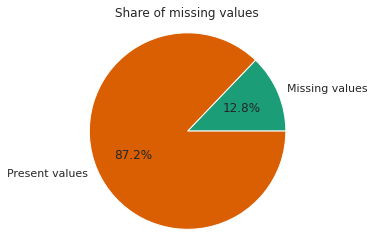

In [6]:
null_values_sum = raw_data.isnull().sum().sum()
notnull_values_sum = raw_data.notnull().sum().sum()

fig, ax = plt.subplots()
ax.pie([null_values_sum, notnull_values_sum], labels=['Missing values', 'Present values'], autopct='%1.1f%%')
ax.axis('equal')  # Making sure chart is a circle
ax.set_title('Share of missing values')
plt.show()

Sorted visualization of missing values :

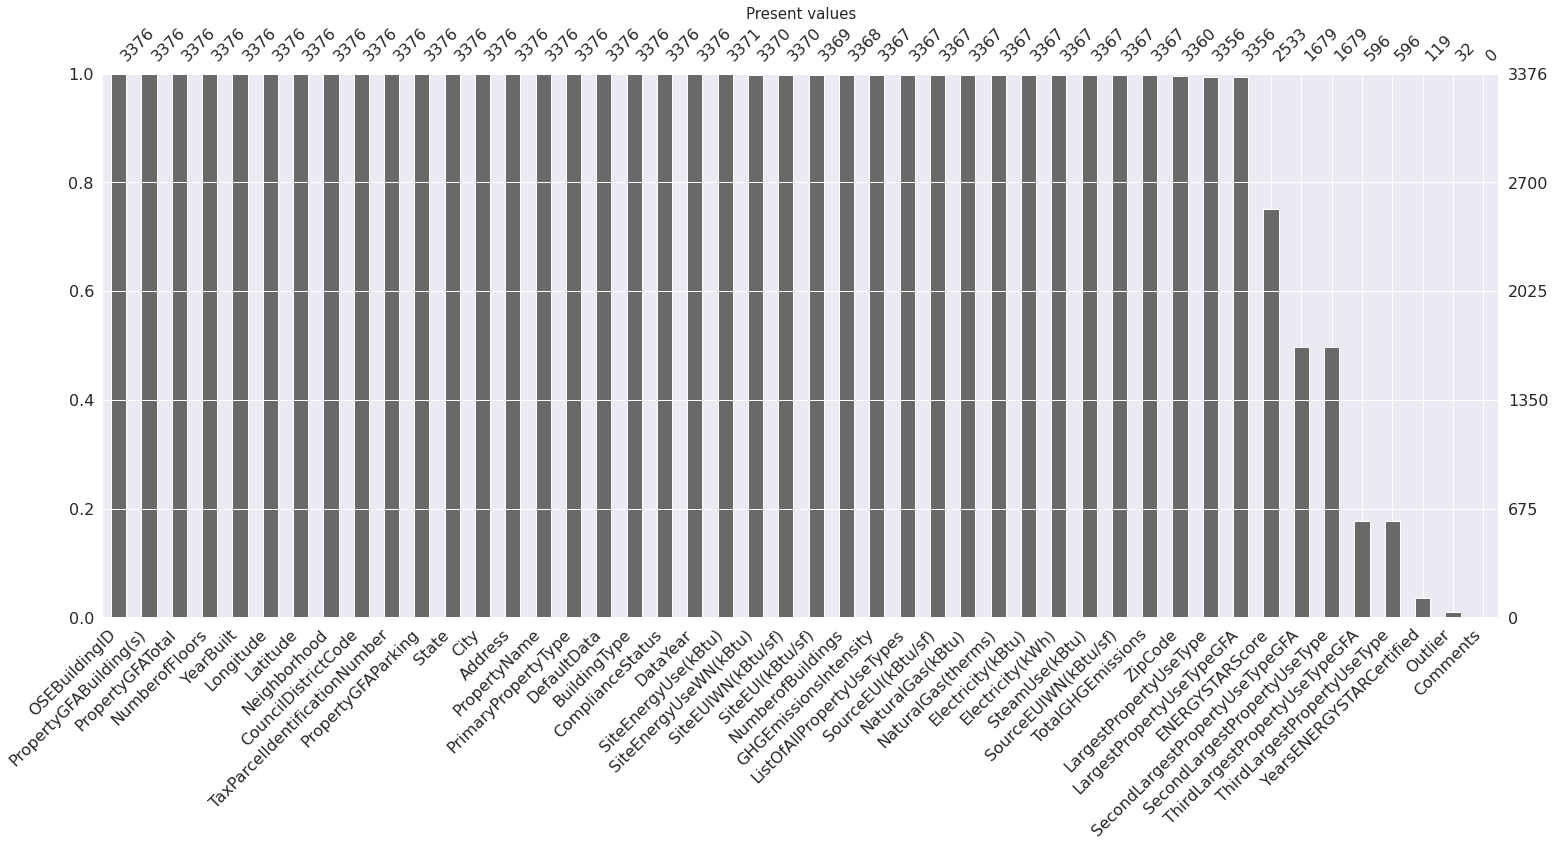

In [7]:
barchart = msno.bar(raw_data, sort="descending")
barchart.set_title("Present values", fontsize=15)
plt.show()

### Selection of pertinents variables

Keep only structural elements : building size, type and year built

In [8]:
# # General information
# building_info_columns = ['OSEBuildingID','PropertyName']

# # Building type
# building_type_columns = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'YearBuilt']

# # Building size
# building_size_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)']

# # Building localization
# building_localization_columns = ['Longitude', 'Latitude']

# # Energystar score
# building_energystar_columns = ['YearsENERGYSTARCertified', 'ENERGYSTARScore']

# # Building energy (also targets)
# building_energy_columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

# # Filter dataset
# build_df = raw_data[building_info_columns + building_type_columns + building_size_columns + building_energystar_columns + building_energy_columns].copy()

# display(build_df.sample(5))

In [9]:
# Filter dataset
build_df = raw_data.copy()

display(build_df.sample(5))

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
582,779,2016,NonResidential,Large Office,Administration Building,500 5TH AVE,Seattle,WA,98104.0,0942000920,...,3.289862e+06,11225008.0,0.0000,0.0,False,NaN,Compliant,NaN,390.67,1.74
2895,27369,2016,Multifamily HR (10+),High-Rise Multifamily,Parkview Plaza,1101 Seneca St,Seattle,WA,98101.0,6669140000,...,1.191634e+06,4065856.0,15056.4502,1505645.0,False,NaN,Compliant,NaN,108.31,1.38
1839,23562,2016,NonResidential,Mixed Use Property,The Travelers Hotel,80 Yesler Way,Seattle,WA,98104.0,8670450000,...,2.256070e+05,769771.0,0.0000,0.0,False,NaN,Compliant,NaN,5.37,0.12
1774,23372,2016,Multifamily LR (1-4),Low-Rise Multifamily,Cumberland Apartments,5941 California Ave. S.W.,Seattle,WA,98136.0,7647500000,...,1.843573e+05,629027.0,0.0000,0.0,False,NaN,Compliant,NaN,4.39,0.15
2373,25432,2016,Multifamily LR (1-4),Low-Rise Multifamily,Dolphin Apartments,1415 NE Ravenna Blvd,Seattle,WA,98105.0,5226300045,...,2.383214e+05,813153.0,0.0000,0.0,False,NaN,Compliant,NaN,5.67,0.27


@TODO: Check that GFATOTAL = GFAParking + GFABuilding

# Exploration

I create a new dataframe from the raw data. I will remove unwanted data and clean the remaining data.

In [10]:
# Create new dataframe
build_df = raw_data.copy()

# Create array to store the columns to remove
columns_to_remove = []

# Print columns to analyze
print(build_df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Building ID

I check for duplicates in buildings ID.

In [11]:
# Check for duplicates in column OSEBuildingID
duplicates = build_df.duplicated(subset=['OSEBuildingID'])
print(str(build_df[duplicates].size) + " duplicates found in the OSEBuildingID column.")

0 duplicates found in the OSEBuildingID column.


Now I am sure all the buildings are unique and I dont need the *OSEBuildingID* variable for the rest of the study.

In [12]:
# Remove OSEBuildingID
columns_to_remove.append('OSEBuildingID')

### Building name

The name of the building is given by the variable *PropertyName*.

In [13]:
# Print PropertyName info
display(build_df['PropertyName'].describe())

count                3376
unique               3362
top       Northgate Plaza
freq                    3
Name: PropertyName, dtype: object

The variable *PropertyName* doesnt give relevant information for our study. I decide to remove it.

In [14]:
# Remove PropertyName
columns_to_remove.append('PropertyName')

### Building types

I check the building types and uses variables.

B̲u̲i̲l̲d̲i̲n̲g̲T̲y̲p̲e


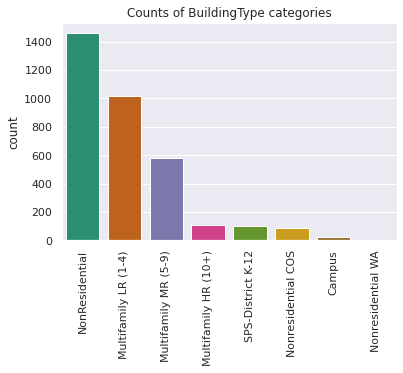




P̲r̲i̲m̲a̲r̲y̲P̲r̲o̲p̲e̲r̲t̲y̲T̲y̲p̲e
                             PrimaryPropertyType
Low-Rise Multifamily                         987
Mid-Rise Multifamily                         564
Small- and Mid-Sized Office                  293
Other                                        256
Warehouse                                    187
Large Office                                 173
K-12 School                                  139
Mixed Use Property                           133
High-Rise Multifamily                        105
Retail Store                                  91
Hotel                                         77
Worship Facility                              71
Distribution Center                           53
Senior Care Community                         45
Supermarket / Grocery Store                   40
Medical Office                                39
Self-Storage Facility                         28
University                                    25
Residence Hall              

In [15]:
# Define building type columns
building_type_columns = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

# Display ordererd countplot
for col in building_type_columns:

  print('\u0332'.join(col))

  if build_df[col].nunique() > 10:
    print(build_df[col].value_counts().to_frame()) # Print text if too much categories 
  else:
    countplot = sns.countplot(x=col, data=build_df, order=build_df[col].sort_values().value_counts().index)
    plt.xticks(rotation = 90)
    plt.title("Counts of " + col + " categories")
    plt.xlabel("")
    plt.show()
  
  print("\n\n")

There is a lot of categories and use types (primary, second, third).

I decide to create new categories that will regroup existing ones.

First a create a dictionnary with the new categories names.

In [16]:
# Dictionary with the new building type names
building_type_dict = {

    # Residential
    'Residential': ['Low-Rise Multifamily', 'Mid-Rise Multifamily', 'High-Rise Multifamily', 'Senior Care Community',
                    'Residence Hall', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential', 
                    'Residential Care Facility'],

    # Office
    'Office': ['Small- and Mid-Sized Office', 'Large Office', 'Office', 'Financial Office', 'Bank Branch'],

    # Education
    'Education': ['K-12 School', 'University', 'College/University', 'Other - Education', 'Adult Education', 
                  'Pre-school/Daycare', 'Vocational School'],

    # Stores and retails
    'Stores': ['Retail Store', 'Supermarket/Grocery Store', 'Supermarket / Grocery Store', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
               'Strip Mall', 'Automobile Dealership', 'Other - Services', 'Other - Mall', 'Wholesale Club/Supercenter', 
               'Enclosed Mall', 'Convenience Store without Gas Station'],

    # Sports and cultural buildings
    'Culture': ['Other - Recreation', 'Other - Entertainment/Public Assembly', 'Social/Meeting Hall', 'Museum',
                'Fitness Center/Health Club/Gym', 'Library', 'Performing Arts', 'Lifestyle Center', 'Convention Center',
                'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Swimming Pool', ],

    # Public services
    'Services': ['Parking', 'Prison/Incarceration', 'Other - Public Services', 'Fire Station', 'Police Station', 'Courthouse'],

    # Industrial and storage buildings
    'Industrial': ['Warehouse', 'Distribution Center', 'Self-Storage Facility', 'Refrigerated Warehouse', 
                   'Non-Refrigerated Warehouse', 'Manufacturing/Industrial Plant', 'Data Center', 'Other - Technology/Science', ],

    # Healtchare
    'Healthcare': ['Medical Office', 'Hospital', 'Laboratory', 'Hospital (General Medical & Surgical)', 
                   'Urgent Care/Clinic/Other Outpatient', 'Other/Specialty Hospital', ],

    # Worship facility
    'Religion': ['Worship Facility'],

    # Hotel
    'Hotel': ['Hotel'],

    # Restaurant
    'Restaurant': ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Bar/Nightclub', 'Food Sales', 'Fast Food Restaurant', ],

    # Other
    'Other': ['Other', 'Mixed Use Property', 'Other - Utility']
}

In [17]:
# Function to get category from multiple value dictionary
def type_to_new_category(current_type, **dictionary):
  new_type = 'NOT_FOUND'

  if (type(current_type) == int) or (type(current_type) == float):
    new_type = 'Other'

  else:
    for dict_type, dict_type_list in dictionary.items():
      if current_type in dict_type_list:
        new_type = dict_type
        break

  return new_type


Then I apply the dictionary on the variable *PrimaryPropertyType*.

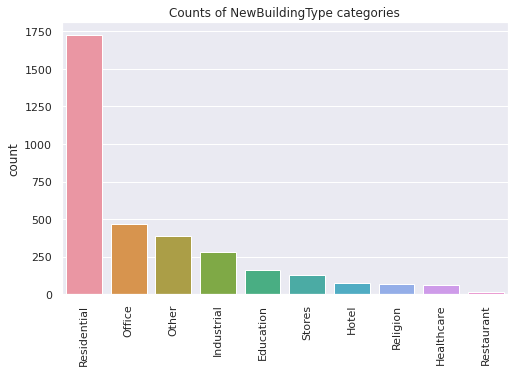

In [18]:
# Create new column name
new_type_col = 'NewBuildingType'
# Store new categories on new column
build_df[new_type_col] = build_df['PrimaryPropertyType'].apply(type_to_new_category, **building_type_dict)

# Display new column
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

There are still a lot of *Other* building type. I decide to apply again the dictionary on these building and the variable *LargestPropertyUseType*. I assume the building type can be given by the largest use type (more than 50% of its gross floor area).

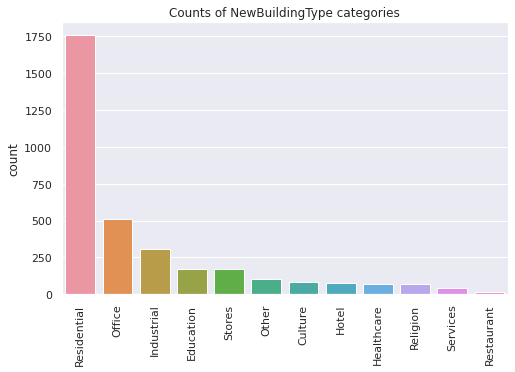

In [19]:
# Select only Other building 
other_index = build_df[build_df[new_type_col] == 'Other'].index

#Apply function
build_df.loc[other_index, new_type_col] = build_df.loc[other_index, 'LargestPropertyUseType'].apply(type_to_new_category, **building_type_dict)

# Display new column
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

The study only concerns the buildings not used for housing.

I remove all *Residential* buildings.

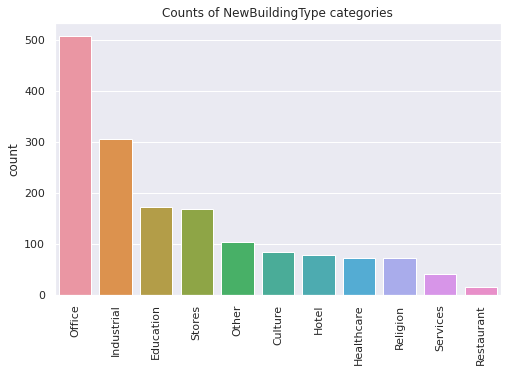

In [20]:
# Remove residential buildings
build_df = build_df[~(build_df[new_type_col] == 'Residential')]

# Display new column
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

After the filtering, the variable *BuildingType* gives no relevant information as they are almost all NonResidential.

In [21]:
# Get number of non residential building
nonres_n = build_df[build_df['BuildingType'].str.contains('nonresidential', flags=re.IGNORECASE)].size
print("{0:.0%} of the buildings are 'NonResidential'".format(nonres_n/build_df.size))

92% of the buildings are 'NonResidential'


I decide to remove it and the remaining building types

In [22]:
# Remove old building type columns
columns_to_remove.extend(building_type_columns)

### Building localization

I check the variables related to the building localization.

In [23]:
# Define building adress columns
building_adress_columns = ['Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
                           'CouncilDistrictCode', 'Neighborhood', 'Longitude', 'Latitude']

# Print information
for col in building_adress_columns:
  display(build_df[col].describe())
  print("\n")

count                  1618
unique                 1598
top       2600 SW Barton St
freq                      4
Name: Address, dtype: object

count        1618
unique          1
top       Seattle
freq         1618
Name: City, dtype: object

count     1618
unique       1
top         WA
freq      1618
Name: State, dtype: object

count     1602.000000
mean     98116.705993
std         18.147128
min      98006.000000
25%      98105.000000
50%      98109.000000
75%      98125.000000
max      98199.000000
Name: ZipCode, dtype: float64

count           1618
unique          1543
top       3224049012
freq               5
Name: TaxParcelIdentificationNumber, dtype: object

count    1618.000000
mean        4.363412
std         2.206461
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         7.000000
Name: CouncilDistrictCode, dtype: float64

count         1618
unique          19
top       DOWNTOWN
freq           355
Name: Neighborhood, dtype: object

count    1618.000000
mean     -122.333331
std         0.024572
min      -122.411820
25%      -122.343482
50%      -122.333170
75%      -122.322117
max      -122.258640
Name: Longitude, dtype: float64

count    1618.000000
mean       47.615485
std         0.048194
min        47.499170
25%        47.584560
50%        47.612185
75%        47.648962
max        47.733870
Name: Latitude, dtype: float64

Because the buildings are all located in Seattle, there is only one value for the variable *City* (Seattle) and for the variable *State* (WA). Thus I decide to remove both variables. 

There is too many different values for the variables *Address*, *ZipCode*, *TaxParcelIdentificationNumber* and *CouncilDistrictCode* (at least one per entry) to make something out of it. I decide to also remove theses variables.

In [24]:
# Remove variables
columns_to_remove.extend(['City', 'State', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode'])

However the categorical variable *Neighborhood* seems to be relevant for our study as we there are 19 differents values.

The variables *Longitude* and *Latitude* are numerical and could also be used with ease.

#### Neighborhood

I check the distribution of the variable *Neighborhood*

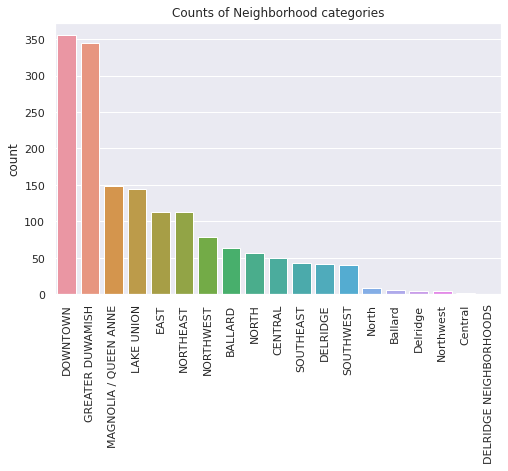

In [25]:
nbhd_col = 'Neighborhood'

# Show Neighborhood values
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=nbhd_col, data=build_df, order=build_df[nbhd_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + nbhd_col + " categories")
plt.xlabel("")
plt.show()

There are duplicates on the categories : two categories *BALLARD*, two categories *NORTH*, two categories *CENTRAL* and three categories *DELRIDGE* (with *DELRIDGE NEIGHBORHOODS* which is the same area).

To fix this, I rewrite every categories with capital letters and replace *DELRIDGE NEIGHBORHOODS* by *DELRIDGE*

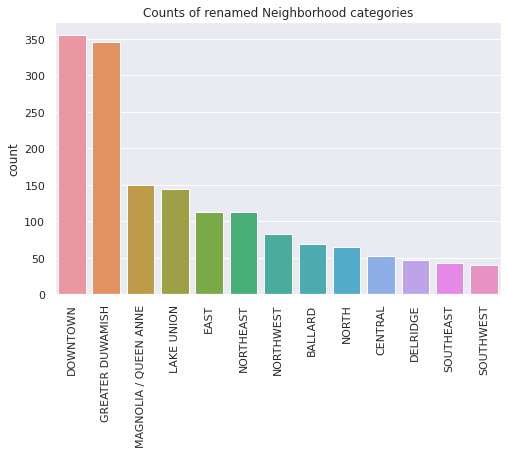

In [26]:
# Rewrite with capital letters
build_df[nbhd_col] = build_df[nbhd_col].str.upper()

# Rename category DELRIDGE NEIGHBOORHOODS
build_df[nbhd_col] = build_df[nbhd_col].replace({'DELRIDGE NEIGHBORHOODS':'DELRIDGE'})

# Show new values
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=nbhd_col, data=build_df, order=build_df[nbhd_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of renamed " + nbhd_col + " categories")
plt.xlabel("")
plt.show()

#### Longitude and latitude

In [27]:
building_position_columns = ['Longitude', 'Latitude']

# Print longitude and latitude information
display(build_df[building_position_columns].describe())

,Longitude,Latitude
count,1618.000000,1618.000000
mean,-122.333331,47.615485
std,0.024572,0.048194
min,-122.411820,47.499170
25%,-122.343482,47.584560
50%,-122.333170,47.612185
75%,-122.322117,47.648962
max,-122.258640,47.733870


According to Google Maps, Seattle longitude is approximately [-122.2, -122.5] and Seattle latitude is approximately [47.4, 47.8]. The longitude and latitude data seems correct. 

I draw the buildings positions on a map of Seattle.

In [28]:
# Function to add a point to a map 
# @TODO: put it elswhere

def add_circle_to_map(row, background_map):
  x = row['Latitude']
  y = row['Longitude']
  folium.Circle([x, y], radius=50).add_to(background_map)

In [29]:
# Seattle longitude and latitude
seattle_location = [47.6062, -122.3321]

# Create a map of Seattle
seattle_map = folium.Map(seattle_location, zoom_start=11)

# Add a point for each building
build_df.apply(add_circle_to_map, background_map=seattle_map, axis=1)

# Display the map
seattle_map

### Building construction date

The construction date is given by the variable *YearBuilt*.

In [30]:
# Print different YearBuilt values
print(build_df['YearBuilt'].unique())

[1927 1996 1969 1926 1980 1999 1904 1998 1928 1922 2004 1930 1983 1907
 1916 1985 1961 2001 1991 1955 1978 1949 1989 1906 1994 1992 1990 1950
 1900 1954 1911 1973 1920 1910 1982 1908 1959 2000 1997 1962 2008 1948
 1965 1929 2010 1938 1986 1970 2002 1923 2003 1957 1964 1941 1963 2006
 1915 1958 2011 1971 2007 1951 1953 1952 1960 1937 1966 1968 1925 1924
 2005 1931 1972 1914 1995 1981 1976 2009 1909 1988 1979 1947 1984 1956
 1912 1977 1921 1913 1945 1974 1975 1946 1967 1987 1940 1932 1993 1918
 1905 1902 1939 1944 1917 1942 1903 2012 2013 1919 1901 1936 1935 2014
 2015]


Building years of construction are stored as float values.

Years are not easy to manipulate. <br>I create a new variable *Age* which will store the age of the building (as of 2016) and remove the variable *YearBuilt*.

In [31]:
# Current year
current_year = 2016

# Create new column Age
build_df['Age'] = current_year - build_df['YearBuilt']

# Cast in int32
build_df['Age'] = build_df['Age'].astype('int32')

print(build_df['Age'].unique())

[ 89  20  47  90  36  17 112  18  88  94  12  86  33 109 100  31  55  15
  25  61  38  67  27 110  22  24  26  66 116  62 105  43  96 106  34 108
  57  16  19  54   8  68  51  87   6  78  30  46  14  93  13  59  52  75
  53  10 101  58   5  45   9  65  63  64  56  79  50  48  91  92  11  85
  44 102  21  35  40   7 107  28  37  69  32  60 104  39  95 103  71  42
  41  70  49  29  76  84  23  98 111 114  77  72  99  74 113   4   3  97
 115  80  81   2   1]


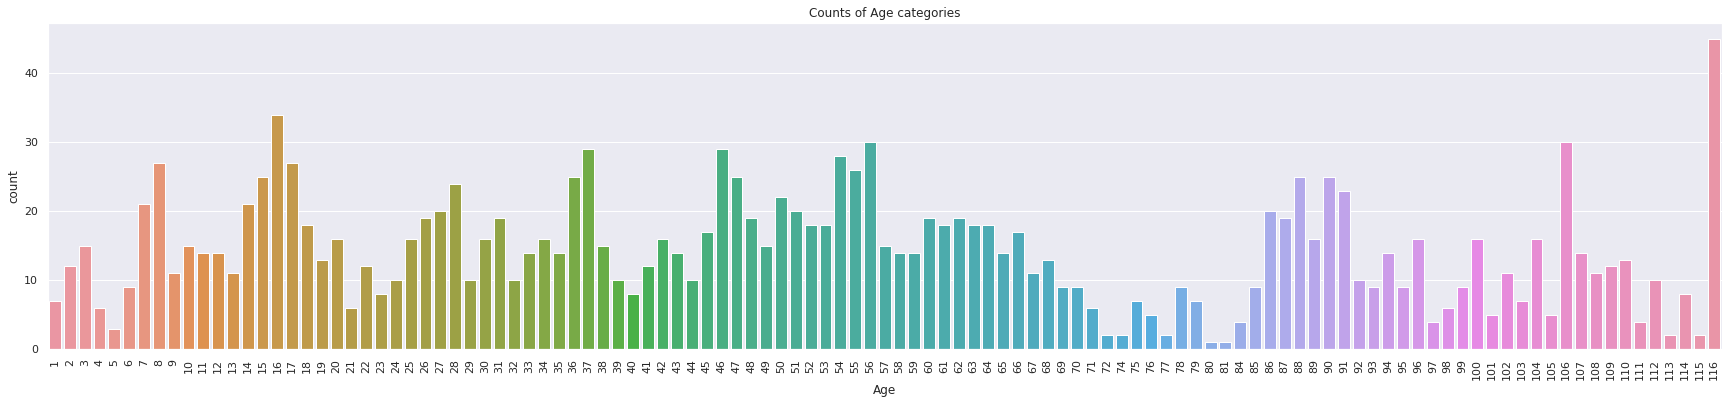

In [32]:
plt.figure(figsize=(30,6))
plt.title("Counts of Age categories")
sns.countplot(x='Age', data=build_df)
plt.xticks(rotation=90)
plt.show()

In [33]:
# Remove the column YearBuilt
columns_to_remove.append('YearBuilt')

### Building elements

The elements of each property is given by its number of buildings (variable *NumberofBuildings*) and its number of floors (*NumberofFloors*).

,NumberofBuildings,NumberofFloors
count,1616.000000,1618.000000
mean,1.172649,4.124227
std,2.974487,6.617570
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,4.000000
max,111.000000,99.000000


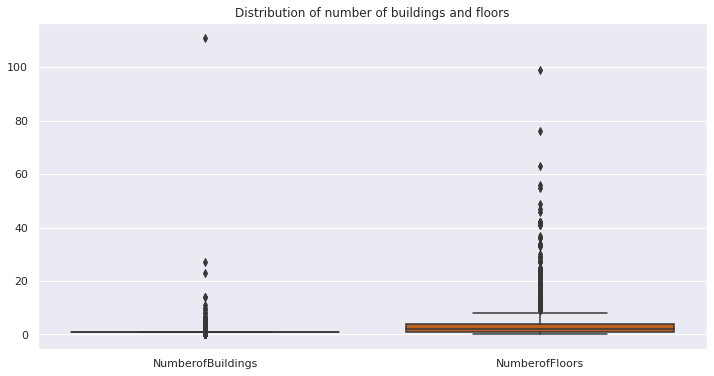

In [34]:
# Define variables
building_elem_columns = ['NumberofBuildings', 'NumberofFloors']

# Print information
display(build_df[building_elem_columns].describe())

# Display distribution
plt.figure(figsize=(12,6))
plt.title("Distribution of number of buildings and floors")
sns.boxplot(data=build_df[building_elem_columns])
plt.show()

I note that there's some entries with *NumberofBuildings*=0 and *NumberofFloors*=0 which is impossible for a real building.

First I check the properties that have a number of buildings equals to zero.

In [35]:
# Display buildings with NumberofBuildings = 0
display(build_df[build_df['NumberofBuildings'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])

,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
63,Polyclinic North && South,1200 Harvard Ave,0.0,3,1965
76,KCTS9,401 Mercer St,0.0,2,1986
160,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,0.0,4,1916
201,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,0.0,3,1968
241,University District Office Buiding,1107 NE 45th St,0.0,5,1961
264,Thaw Building,8300 Military Rd South,0.0,1,1970
278,Fourth and Pike Building,1424 4th Ave,0.0,10,1926
280,Motif Seattle,1414 4th Ave,0.0,19,1973
291,Meridian (East),1501 7th Ave,0.0,4,1996
358,Westbridge,4209 W Marginal Way SW,0.0,1,1955


I searched for theses buildings on Google Maps thanks to their *Address* and they all exist today. <br> I decide to replace them with a *NumerofBuilding* of 1.

In [36]:
# Replace 0 by 1
build_df['NumberofBuildings'] = build_df['NumberofBuildings'].replace(0, 1)

Then I check the properties that have a number of floors equals to zero.

In [37]:
# Display buildings with NumberofFloors = 0
display(build_df[build_df['NumberofFloors'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])

,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
166,Grand Hyatt Seattle,721 Pine St,1.0,0,1999
487,Arnold Pavilion,1221 Madison Street,1.0,0,2004
488,2200 Westlake - SEDO,2200 Westlake Ave.,1.0,0,2006
564,Pacific Place,600 Pine Street,1.0,0,1999
1754,HART First Hill LLC,1124 Columbia Street,1.0,0,1945
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,1333 AIRPORT WAY S,10.0,0,1991
3130,Sandpoint #5,7561 63rd Ave NE,1.0,0,1940
3131,Sandpoint #25,6222 NE 74th St,1.0,0,1960
3132,Sandpoint #29,6200 NE 74th ST,1.0,0,1960
3168,Magnuson,7400 Sand Point Way NE,8.0,0,1929


I searched for theses buildings on Google Search and Google Maps and I found the following information :


*  Grand Hyatt Seattle	: 4-star hotel with 30 floors
*  Arnold Pavilion : 12 floors building, part of the Swedish Medical Center
* 2200 Westlake : 3 floors building
* Pacific Place	: 3 floors building
* HART First Hill LLC : 7 floors building, part of the Swedish Medial Center
* KC Metro Transit Atlantic : 1 floor warehouse
* Sandpoint #5 : 2 floors building
* Sandpoint #25 : 2 floors building
* Sandpoint #29 : 3 floors building
* Magnuson : 2 floors building
* Smilow Rainier Vista Boys & Girls Club : 2 floors building
* University of Washington : lots of buildings, 4 floors in average


I fix the number of floors in the dataset.

In [38]:
# Grand Hyatt Seattle
build_df.loc[[166]]['NumberofFloors'] = 30

# Arnold Pavilion
build_df.loc[[487]]['NumberofFloors'] = 12

# 2200 Westlake, Pacific Place, Sandpoint #29
build_df.loc[[488, 564, 3132]]['NumberofFloors'] = 3

# HART First Hill LLC
build_df.loc[[1754]]['NumberofFloors'] = 7

# KC Metro Transit Atlantic
build_df.loc[[1993]]['NumberofFloors'] = 1

# Sandpoint #5, Sandpoint #25, Magnuson, Smilow Rainier Vista Boys & Girls Club
build_df.loc[[3130, 3131, 3168, 3273]]['NumberofFloors'] = 2

# University of Washington
build_df.loc[[3274]]['NumberofFloors'] = 4

In the distribution we can see that the variable *NumberofBuildings* contains one outlier (value=111) that looks too considerable for a single property.
<br>In the same way, the variable *NumberofFloors* contains several outliers with more than 70 floors.

In [39]:
# Display building with NumberofBuilding = 111
display(build_df[build_df['NumberofBuildings'] == 111])

# Display building with NumberofFloor > 70
display(build_df[build_df['NumberofFloors'] > 70])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2,Education,116


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age
559,775,2016,NonResidential,Large Office,Columbia Center - 2015,701 5th Avenue,Seattle,WA,98104.0,0942000640,...,50857.63281,5085763.0,False,NaN,Compliant,NaN,882.56,0.45,Office,31
1359,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,Seattle,WA,98108.0,2124049098,...,0.00000,0.0,False,NaN,Compliant,NaN,2.27,0.10,Religion,39


It appears the *NumberofBuilding* outlier is the University of Washington and the number of buildings is correct.

The two outliers for *NumberofFloors* are the Columbia Center and the Seattle Chinese Baptist Church. <br>According to Google, the Columbia Center has 76 floors which is correct. <br>The Church however cannot have 99 floors. 
I fix the number of floors of the church to 1.

In [40]:
# Replace the outlier value
build_df.loc[[1359], 'NumberofFloors'] = 1

I also take the opportunity to cast the two variable *NumberofBuildings* and *NumberofFloors* as integer.

In [41]:
# Change column type to integer
build_df[building_elem_columns] = build_df[building_elem_columns].astype('Int32') # panda built in integer

### Building areas

The area of the buildings is given by the gross floor area. The related variables are *PropertyGFATotal*, *PropertyGFAParking* and *PropertyGFABuilding(s)*.

,count,mean,std,min,25%,50%,75%,max
PropertyGFATotal,1618.0,119838.795426,300796.762829,11285.0,29500.50,49250.5,106030.75,9320156.0
PropertyGFABuilding(s),1618.0,106618.759580,287413.419192,10925.0,28507.75,47316.5,94853.25,9320156.0
PropertyGFAParking,1618.0,13220.035847,42922.136316,0.0,0.00,0.0,0.00,512608.0
LargestPropertyUseTypeGFA,1612.0,99411.576923,280273.135985,5656.0,25575.50,43770.5,92036.75,9320156.0
SecondLargestPropertyUseTypeGFA,831.0,37303.040068,70249.480103,0.0,5350.00,12023.0,32128.00,686750.0
ThirdLargestPropertyUseTypeGFA,340.0,14942.709996,36868.508747,0.0,2624.25,5884.0,13107.25,459748.0


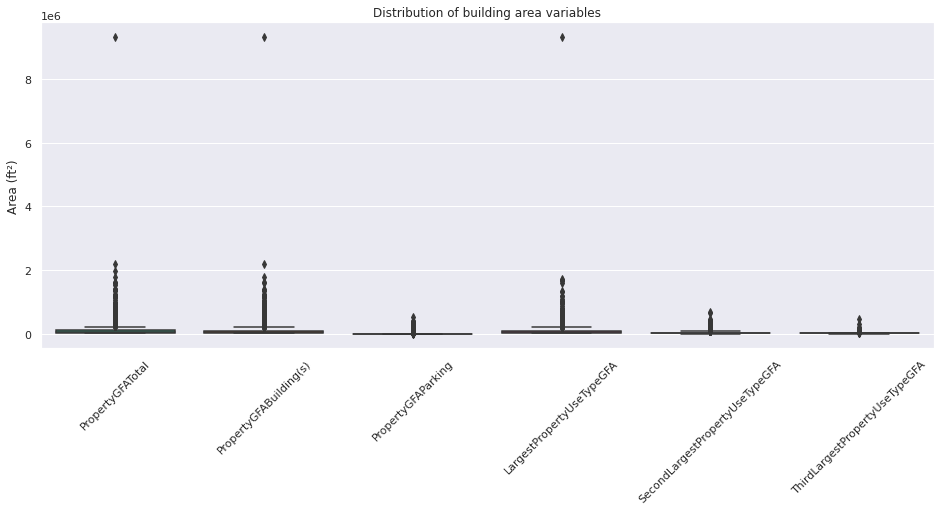

In [42]:
# Define variables
building_area_columns = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 
                         'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
                         'ThirdLargestPropertyUseTypeGFA']

# Print information
display(build_df[building_area_columns].describe().T)

# Display distribution
plt.figure(figsize=(16,6))
plt.title("Distribution of building area variables")
sns.boxplot(data=build_df[building_area_columns])
plt.xticks(rotation = 45)
plt.ylabel("Area (ft²)")
plt.show()

According to the data source, the variable *PropertyGFATotal* is the addition of the variables *PropertyGFABuilding(s)* and *PropertyGFAParking*.
<br>I will first verify this statement.

In [43]:
# Check if GFA Total is not equals to the sum of Building(s) + Parking
if(build_df['PropertyGFATotal'].equals(build_df['PropertyGFABuilding(s)'] + build_df['PropertyGFAParking']) == True):
  print("PropertyGFATotal is the correct sum of PropertyGFABuilding(s) and PropertyGFAParking")

PropertyGFATotal is the correct sum of PropertyGFABuilding(s) and PropertyGFAParking


Because *PropertyGFATotal* is the addition of other variables, it is not needed for our prediction. I decide remove it.

In [44]:
# Remove PropertyGFATotal
building_area_columns.remove('PropertyGFATotal')
columns_to_remove.append('PropertyGFATotal')

We can see on the previous distribution that there is a large outlier (approx. 9millions square feet).

In [45]:
# Get GFA outlier value
gfa_max_value = build_df['PropertyGFABuilding(s)'].max()
gfa_max_index = build_df['PropertyGFABuilding(s)'].idxmax()
print("The largest property GFA is " + str(gfa_max_value) + " (index=" + str(gfa_max_index) + ")")

# Print GFA outlier row
display(build_df.loc[build_df.index == gfa_max_index])

The largest property GFA is 9320156 (index=3274)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2,Education,116


The outlier property is the University of Washington (again!). The value of its GFA is coherent as the university is composed of 111 buildings. 

Distribution without the university (outlier):

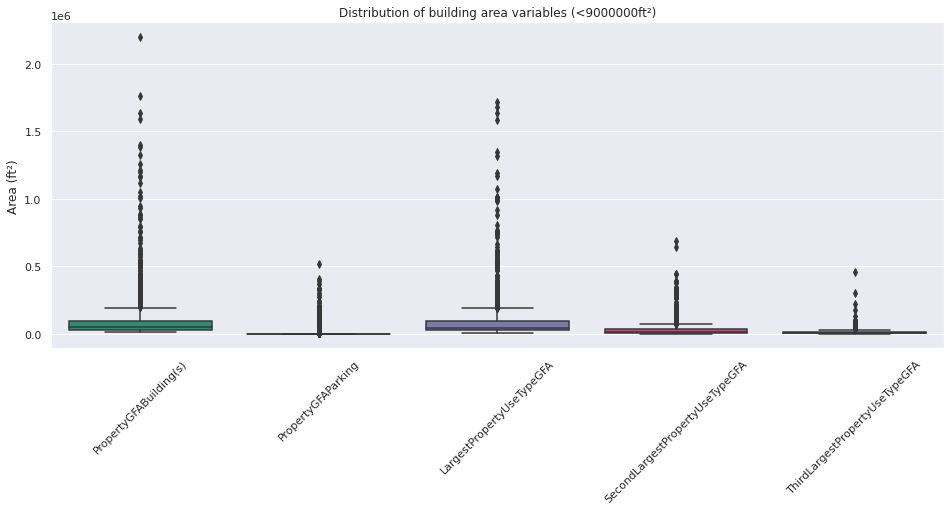

In [46]:
# Display distribution
plt.figure(figsize=(16,6))
plt.title("Distribution of building area variables (<9000000ft²)")
sns.boxplot(data=build_df[build_df['PropertyGFABuilding(s)'] < 9000000][building_area_columns])
plt.ylabel("Area (ft²)")
plt.xticks(rotation = 45)
plt.show()

I check the NaN values of theses area variables.

In [47]:
# Display NaN values 
display(build_df[building_area_columns].isna().sum())

PropertyGFABuilding(s)                0
PropertyGFAParking                    0
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseTypeGFA     787
ThirdLargestPropertyUseTypeGFA     1278
dtype: int64

The GFA variables based on the building type *LargestPropertyUseTypeGFA*, *SecondLargestPropertyUseTypeGFA* and *ThirdLargestPropertyUseTypeGFA* have many missing values (respectively 6, 768 and 1255 values). Moreover it is hard to predict and could be data leakage for the prediction on new buildings. Thus I decide to remove them. 

In [48]:
# Remove GFA building type variables
columns_to_remove.extend(['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])

Now I want to have a better view of the buildings GFA distribution. <br>To remove the effect of the outliers I try to display the common logarithm.

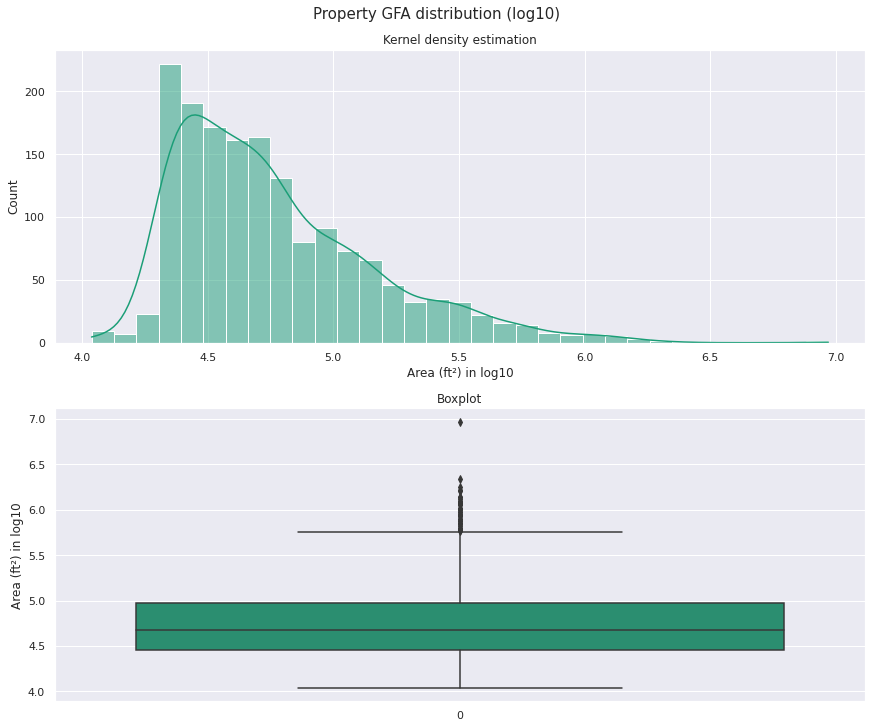

In [52]:
# Compute log10 variable
building_gfa_log10 = np.log10(build_df['PropertyGFABuilding(s)'])

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Property GFA distribution (log10)", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("Area (ft²) in log10")
sns.histplot(data=building_gfa_log10, kde=True, ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Area (ft²) in log10")
sns.boxplot(data=building_gfa_log10, ax=ax[1])
plt.show()

I decide to use the log10 of the *PropertyGFABuilding(s)* variable. The logarithm doesnt lose information and it normalizes the distribution. 

In [51]:
# Replace existing PropertyGFABuilding(s) by the log10 transformation
build_df['PropertyGFABuildings(log10)'] = building_gfa_log10

# Remove existing
build_df = build_df.drop(columns=['PropertyGFABuilding(s)'])

### Building energy use

The building energies consumptions are identified by the several variables. They include the gas, the electricity and the steam use. 

In [52]:
# Define energy uses variables
building_energy_columns = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']

# Print information
display(build_df[building_energy_columns].describe().T)
print("\n")

,count,mean,std,min,25%,50%,75%,max
SiteEUI(kBtu/sf),1615.0,7.192842e+01,7.462045e+01,0.00000,3.355000e+01,5.140000e+01,8.030000e+01,8.344000e+02
SiteEUIWN(kBtu/sf),1615.0,7.429542e+01,7.556308e+01,0.00000,3.525000e+01,5.350000e+01,8.365000e+01,8.344000e+02
SourceEUI(kBtu/sf),1616.0,1.759941e+02,1.880872e+02,0.00000,7.605000e+01,1.306500e+02,2.022750e+02,2.620000e+03
SourceEUIWN(kBtu/sf),1616.0,1.781517e+02,1.880286e+02,-2.10000,7.867500e+01,1.333500e+02,2.038500e+02,2.620000e+03
SiteEnergyUse(kBtu),1616.0,8.519647e+06,3.069470e+07,0.00000,1.213240e+06,2.502106e+06,6.882718e+06,8.739237e+08
SiteEnergyUseWN(kBtu),1615.0,8.125652e+06,2.235698e+07,0.00000,1.270683e+06,2.654316e+06,7.069440e+06,4.716139e+08
SteamUse(kBtu),1616.0,5.375023e+05,5.617638e+06,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.349435e+08
Electricity(kWh),1616.0,1.737068e+06,6.184826e+06,-33826.80078,2.103551e+05,4.672902e+05,1.434812e+06,1.925775e+08
Electricity(kBtu),1616.0,5.926877e+06,2.110263e+07,-115417.00000,7.177312e+05,1.594394e+06,4.895578e+06,6.570744e+08
NaturalGas(therms),1616.0,1.940810e+04,9.471774e+04,0.00000,0.000000e+00,4.752735e+03,1.464761e+04,2.979090e+06


I use a correlation matrix to detect any link between the energy variables.

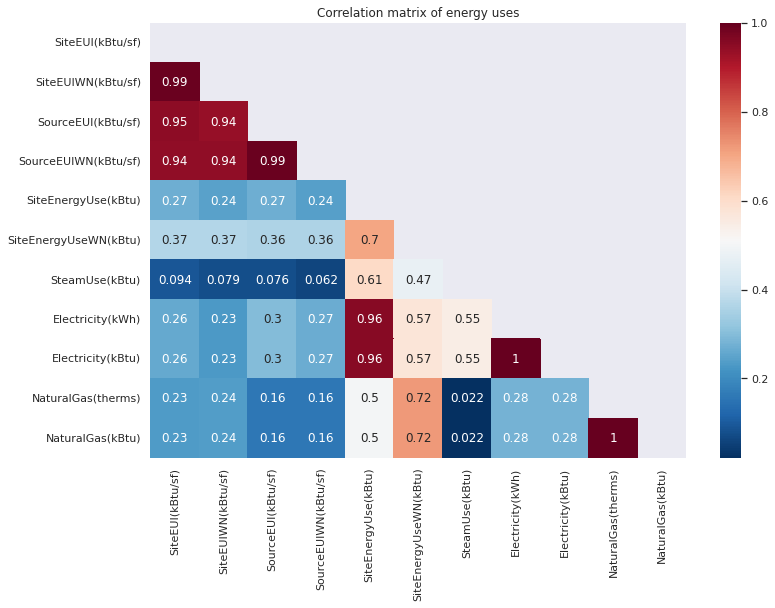

In [53]:
# Create correlation dataframe
corr = build_df[building_energy_columns].corr()

# Display heatmap
plt.figure(figsize=(12,8))
plt.title("Correlation matrix of energy uses")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.abs(), mask=mask, cmap='RdBu_r', annot=True)
plt.show()

The matrix gives the following information :
* *Electricity(kBtu)* is perfectly correlated to *Electricity(kWh)*
* *NaturalGas(kBtu)* is perfectly correlated to *NaturalGas(therms)*
* *SiteEUI* is strongly correlated to *SiteEUIWN*, *SourceEUI* and *SourceEUIWN*
* *SourceEUI* is strongly correlated to *SourceEUIWN*, *SiteEUI* and *SiteEUIWN*
* *SiteEnergyUse* is strongly correlated to *Electricity*

For this study , I need to predict the total energy consumption of the buildings.

Thus I choose the variable **SiteEnergyUse(kBtu)** as the first target. It is the annual amount of energy consumed by the property from all sources of energy. When comparing building it's normally better to use weather normalized data but here I assumed the weather is the same in all Seattle and have no influence.

Then to avoid data leakages I remove the other energy variables.

In [54]:
columns_to_remove.extend(['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 
                          'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 
                          'NaturalGas(therms)', 'NaturalGas(kBtu)'])

Let's check the distribution of the target *SiteEnergyUse(kBtu)*.

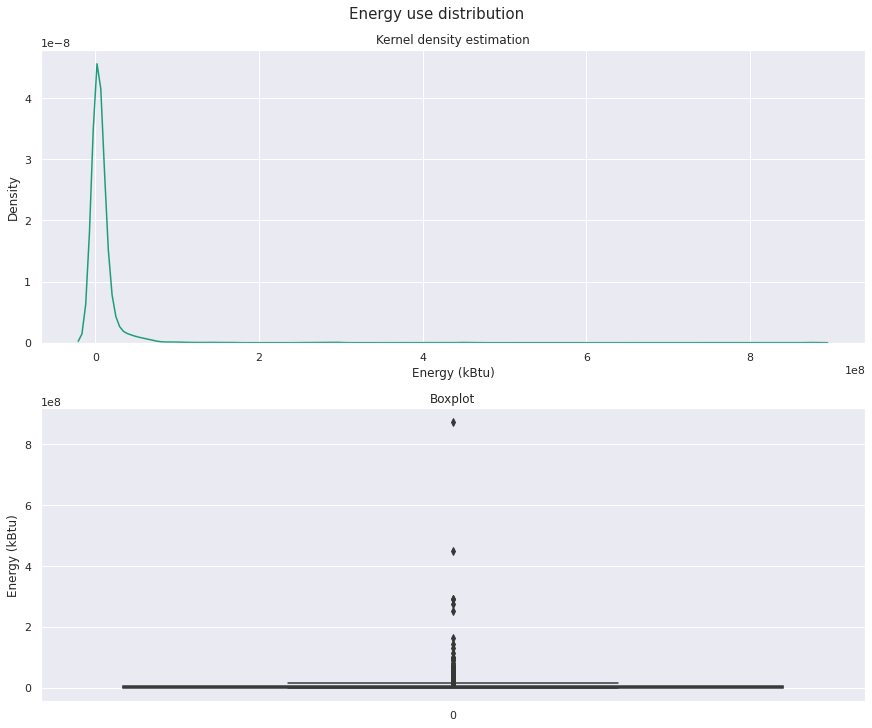

In [55]:
energy_use_col = 'SiteEnergyUse(kBtu)'

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Energy use distribution", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("Energy (kBtu)")
sns.kdeplot(data=build_df[energy_use_col], ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Energy (kBtu)")
sns.boxplot(data=build_df[energy_use_col], ax=ax[1])
plt.show()

There is an important outlier for *SiteEnergyUse* at approximately 880 MkBtu.

First I want to find which building is responsible for this outlier.

In [56]:
# Get energy outlier value
energy_max_value = build_df[energy_use_col].max()
energy_max_index = build_df[energy_use_col].idxmax()
print("The largest energy use is " + str(energy_max_value) + " (index=" + str(energy_max_index) + ")")

The largest energy use is 873923712.0 (index=3274)


In [57]:
# Display the energy outlier
display(build_df.loc[[energy_max_index]])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10)
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,0.0,False,NaN,Compliant,NaN,11140.56,1.2,Education,116,6.969423


Without surprise the outlier is again the University of Washington. Which seems coherent because it is composed of a hundred buildings.

I also noted that there are zero values for the target *SiteEnergyUse(kBtu)*. Let's check the properties that do not consume any energy.

In [58]:
# Display zero energy use
display(build_df[build_df[energy_use_col] == 0])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10)
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,...,0.0,False,NaN,Missing Data,NaN,0.00,0.00,Education,61,5.101579
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,...,0.0,False,NaN,Missing Data,NaN,10.43,0.20,Education,27,4.712498
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,...,0.0,False,NaN,Missing Data,NaN,4.19,0.08,Education,68,4.727151
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,...,0.0,False,NaN,Missing Data,NaN,11.84,0.16,Education,17,4.871970
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,...,0.0,False,NaN,Missing Data,NaN,16.36,0.28,Education,25,4.770359
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,...,0.0,False,NaN,Missing Data,NaN,14.67,0.22,Education,25,4.823396
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,...,4318917.0,False,NaN,Missing Data,NaN,229.38,1.43,Education,57,5.204852
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,...,3217877.0,False,NaN,Missing Data,NaN,170.90,1.25,Education,53,5.134139
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,...,0.0,False,NaN,Missing Data,NaN,0.00,0.00,Education,27,4.722568
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,...,0.0,False,NaN,Non-Compliant,NaN,0.00,0.00,Culture,26,6.146128


As I cannot find the reason why these buildings don't have any energy use, I decide to remove them.

In [59]:
# Indexes of zero energy use
index = build_df[build_df[energy_use_col] == 0].index

# Remove indexes
build_df = build_df.drop(index)
print("Remove the " + str(len(index)) + " properties that have zero energy use.")

Remove the 17 properties that have zero energy use.


Now I want to have a better view of the target energy use distribution. <br>To remove the effect of the outliers I try to display the common logarithm.

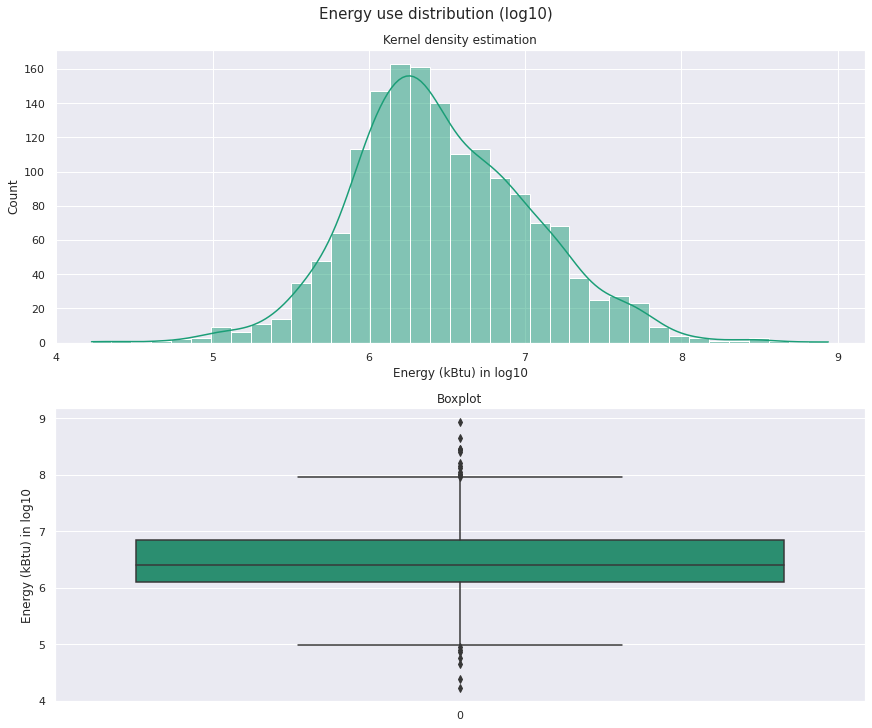

In [60]:
# Compute log10 targets
energy_use_log10 = np.log10(build_df[energy_use_col])

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Energy use distribution (log10)", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("Energy (kBtu) in log10")
sns.histplot(data=energy_use_log10, kde=True, ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Energy (kBtu) in log10")
sns.boxplot(data=energy_use_log10, ax=ax[1])
plt.show()

I decide to use the log10 of this target for the prediction, I replace it in the dataset.

In [61]:
# Replace existing SiteEnergyUse(kBtu) by the log10 transformation
build_df['SiteEnergyUse(log10)'] = energy_use_log10

# Remove existing
build_df = build_df.drop(columns=[energy_use_col])

Because *SiteEnergyUse(kBtu)* is a target for the predition, I also remove the entries with NaN value for this variable.

In [62]:
energy_use_col = 'SiteEnergyUse(log10)'

# Display NaN values number
print("There are " + str(build_df[energy_use_col].isna().sum()) + " NaN values for " + energy_use_col)

# Remove NaN values for SiteEnergyUse(kBtu)
build_df = build_df.dropna(subset=[energy_use_col])

There are 2 NaN values for SiteEnergyUse(log10)


### Building GHGE

There are two variables that give information on greenhouse gas emissions (GHGE).

In [63]:
# Define energy uses variables
building_ghge_columns = ['TotalGHGEmissions', 'GHGEmissionsIntensity']
building_ghge_unit = ['metric ton of co2 equivalent', 'kg of co2 equivalent per sf²']

# Print information
display(build_df[building_ghge_columns].describe())
print("\n")

,TotalGHGEmissions,GHGEmissionsIntensity
count,1599.000000,1599.000000
mean,187.361639,1.599106
std,767.716666,2.345687
min,-0.800000,-0.020000
25%,20.005000,0.350000
50%,49.180000,0.860000
75%,139.285000,1.825000
max,16870.980000,34.090000


For our study I need to predict the total greenhouse gas emissions of buildings.
<br>The variable **TotalGHGEmissions** is the second target. It is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent.

*GHGEmissionsIntensity* is just *TotalGHGEmissions* divided by the property GFA. I decide to remove it.

In [64]:
# Remove GHGEmissionsIntensity column
columns_to_remove.append('GHGEmissionsIntensity')

Now let's check the distribution of the target *TotalGHGEmission*.

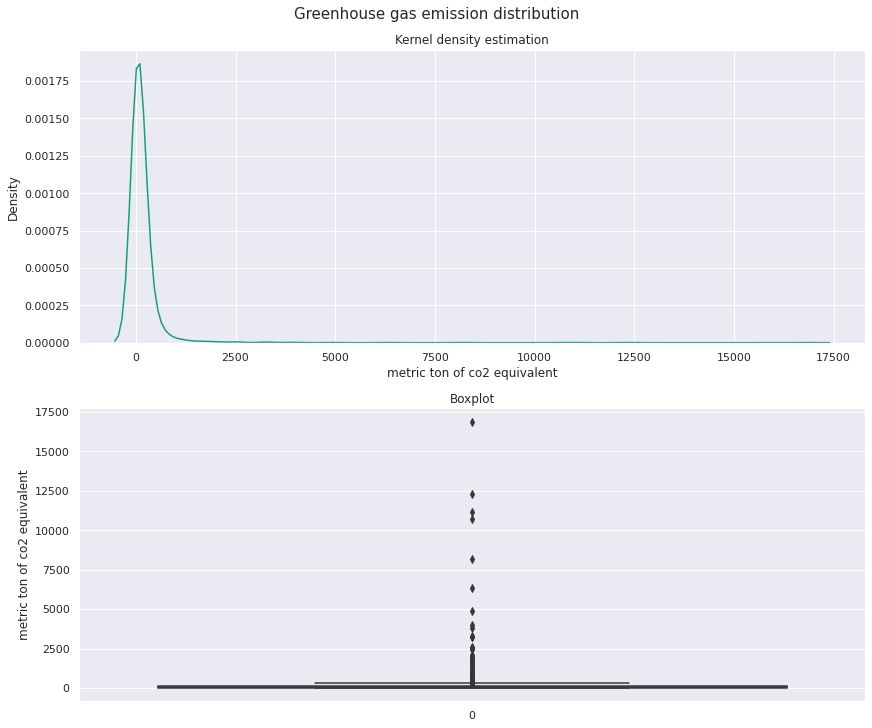

In [65]:
ghge_col = 'TotalGHGEmissions'

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Greenhouse gas emission distribution", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("metric ton of co2 equivalent")
sns.kdeplot(data=build_df[ghge_col], ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("metric ton of co2 equivalent")
sns.boxplot(data=build_df[ghge_col], ax=ax[1])
plt.show()

There are four important outlier for *TotalGHGEmission* with more than 10000 metric tons of co2 equivalent.

First I want to find which building are responsible for theses outliers.

In [66]:
# Display ghge > 10000
display(build_df[build_df[ghge_col] > 10000])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10)
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,...,False,NaN,Compliant,NaN,16870.98,34.09,Office,24,5.694460,8.651651
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,...,False,NaN,Compliant,NaN,10734.57,9.26,Healthcare,16,6.063968,8.467002
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,...,False,NaN,Compliant,NaN,12307.16,6.97,Healthcare,22,6.246983,8.464809
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,False,NaN,Compliant,NaN,11140.56,1.20,Education,116,6.969423,8.941474


Two of the outliers are hospital which seems correct that theses have large green house gas emissions. 

One of the outliers is (again) the university of Washington. Given the number of buildings this property have it seems coherent that it also have large green house gas emission.

The last outlier appears to be a building for Beoing. It is also the max of the variable *GHGEmissionIntensity*. As I cannot explain why its emissions are way larger than the other building of the same type, I decide to remove it.

In [67]:
# Remove outlier
build_df = build_df.drop(35)

There values equal to zero and less for *TotalGHGEmissions*.
<br> I want to find all zero values and the associated properties as it is weird for a building to not emit any greenhouse gas.

In [68]:
# Display zero GHG emissions
display(build_df[build_df[ghge_col] <= 0])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10)
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,...,False,NaN,Compliant,NaN,0.0,0.00,Stores,8,4.757214,7.097784
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,...,False,NaN,Compliant,NaN,-0.8,-0.02,Office,3,4.716003,5.534947


The building with negative greenhouse gas emission is the Bullitt Center.
I looked for information on this building and find out it has large sonar panels that produce more electricity than it uses (https://bullittcenter.org/building/building-features/solar-district-1/). It explains the negative value. Still I decide to remove it as it can interfer the results of the prediction.

The building with zero greehouse gas emission is a simple grocercy store, I also remove it.


In [69]:
# Indexes of zero GHG emissions
index = build_df[build_df[ghge_col] <= 0].index

# Remove indexes
build_df = build_df.drop(index)

Now I want to have a better view of the target *TotalGHGEmission*. <br>To remove the effect of the outliers I try to display the common logarithm.

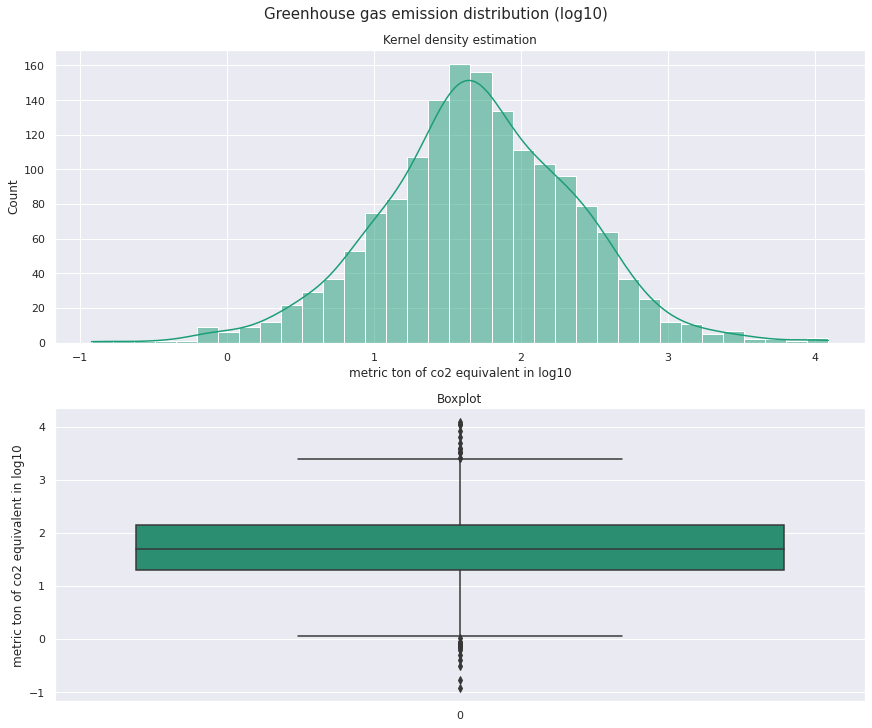

In [70]:
# Compute log10 targets
ghge_log10 = np.log10(build_df[ghge_col])

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Greenhouse gas emission distribution (log10)", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("metric ton of co2 equivalent in log10")
sns.histplot(data=ghge_log10, kde=True, ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("metric ton of co2 equivalent in log10")
sns.boxplot(data=ghge_log10, ax=ax[1])
plt.show()

I decide to use the log10 of this target for the prediction, I replace it in the dataset.

In [71]:
# Replace existing TotalGHGEmission by the log10 transformation
build_df['TotalGHGEmissions(log10)'] = ghge_log10

# Remove existing
build_df = build_df.drop(columns=[ghge_col])

Because *TotalGHGEmissions* is a target for the predition, I also remove the entries with NaN value for this variable.

In [72]:
ghge_col = 'TotalGHGEmissions(log10)'

# Display NaN values number
print("There are " + str(build_df[ghge_col].isna().sum()) + " NaN values for " + ghge_col)

# Remove NaN values for TotalGHGEmissions
build_df = build_df.dropna(subset=[ghge_col])

There are 0 NaN values for TotalGHGEmissions(log10)


### Building ENERGY STAR score

The ENERGY STAR score provides a comprehensive snapshot of building’s energy performance, taking into account the building’s physical assets, operations, and occupant behavior. It is expressed on an easy-to-understand 1 to 100 scale, where the higher the score, the better the energy performance of the building. It’ll help you identify which buildings in your portfolio to target for improvement or recognition.

A score of 50 is the median. Lower is worse than average; higher is better.

In the dataset there is two variables related to the ENERGY STAR score; the score itself (variable *ENERGYSTARScore*) and the number of years certified (*YearsENERGYSTARCertified*)

In [73]:
# Define variables
building_star_columns = ['ENERGYSTARScore','YearsENERGYSTARCertified']

# Print information
display(build_df[building_star_columns].describe())
display(build_df[building_star_columns].isna().sum())

,ENERGYSTARScore
count,1051.000000
mean,65.650809
std,28.312959
min,1.000000
25%,49.000000
50%,73.000000
75%,89.000000
max,100.000000


ENERGYSTARScore              545
YearsENERGYSTARCertified    1499
dtype: int64

In [74]:
# Display count of YearsENERGYSTARTCertified
display(build_df['YearsENERGYSTARCertified'].value_counts())

2016                    11
2017                     5
2013                     4
2009                     4
20162015                 4
                        ..
2017201520142013         1
201620152012             1
2012201020072006         1
20152014201220112009     1
20162015201020092008     1
Name: YearsENERGYSTARCertified, Length: 64, dtype: int64

The variable *YearsENERGYSTARCertified* is not relevant for the study. I remove it.

In [75]:
# Remove YearsENERGYSTARTCertified column
columns_to_remove.append('YearsENERGYSTARCertified')

Let's check the distribution of *ENERGYSTARScore*.

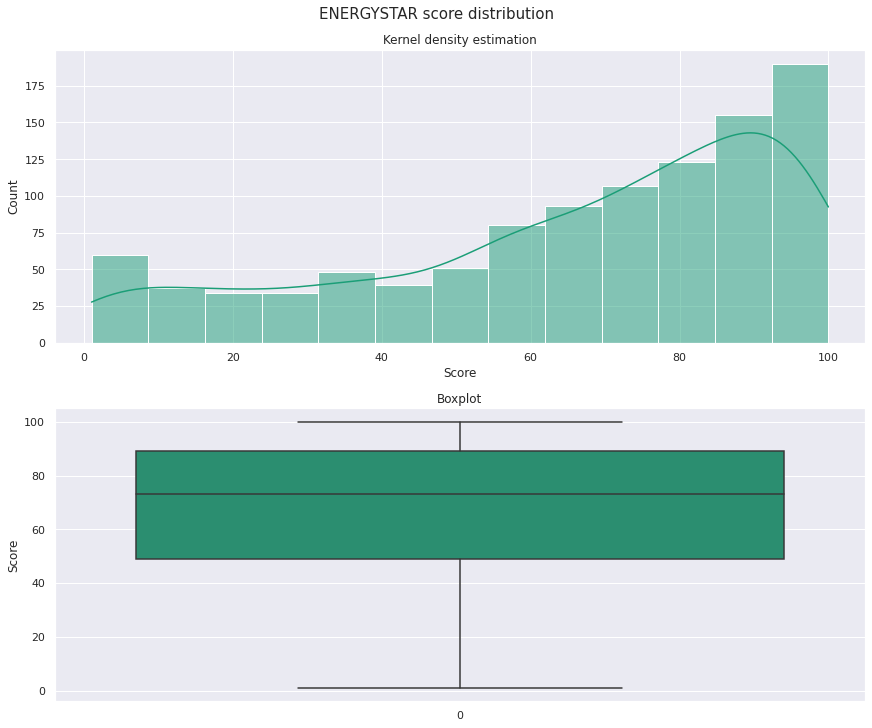

In [76]:
energystar_col = 'ENERGYSTARScore'

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("ENERGYSTAR score distribution", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("Score")
sns.histplot(data=build_df[energystar_col], kde=True, ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
sns.boxplot(data=build_df[energystar_col], ax=ax[1])
plt.show()

There are a lot of missing values. I decide to use the KNN imputation method to fill theses values.

In [77]:
# Create dataframe for the filling
knn_df = build_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

# Choose a number of neighbots
n_neighbors = 6

# Knn imputation
print("KNNImputer with n_neighbors=" + str(n_neighbors) + "...")
imputer = KNNImputer(n_neighbors=n_neighbors)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)

KNNImputer with n_neighbors=6...


Compare the distribution before et after the filling.

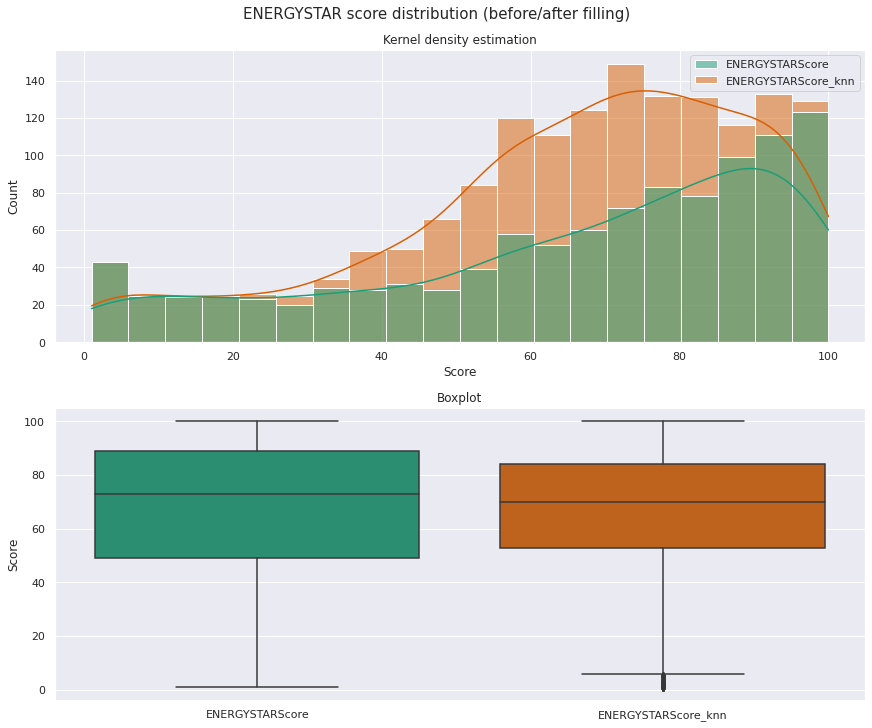

In [78]:
# Create dataframe for comparison
compare_df = pd.concat([build_df[energystar_col], knn_df[energystar_col].rename('ENERGYSTARScore_knn')], axis=1)
# display(compare_df.head(5))

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("ENERGYSTAR score distribution (before/after filling)", fontsize=15)

# Draw distribution
ax[0].set_title("Kernel density estimation")
ax[0].set_xlabel("Score")
sns.histplot(data=compare_df, kde=True, ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("")
sns.boxplot(data=compare_df, ax=ax[1])
plt.show()

The distribution after the KNN seems acceptable. I replace the values in the original dataframe.

In [79]:
# Replace ENERGYSTARScore filled value
build_df[energystar_col] = knn_df[energystar_col].to_numpy()

# Check NaN value to confirm
print("Remaining NaN values : ", build_df[energystar_col].isna().sum())

Remaining NaN values :  0


### Other variables

#### DataYear

In [80]:
# Display different data year
print(build_df['DataYear'].unique())

[2016]


All the data is only from 2016. I remove this variable.

In [81]:
# Remove DataYear
columns_to_remove.append('DataYear')

#### ListOfAllPropertyUseTypes

In [82]:
# Display property use types list
display(build_df['ListOfAllPropertyUseTypes'].value_counts())

Office                                                                                              138
K-12 School                                                                                         121
Office, Parking                                                                                     120
Non-Refrigerated Warehouse                                                                          101
Non-Refrigerated Warehouse, Office                                                                   61
                                                                                                   ... 
Multifamily Housing, Non-Refrigerated Warehouse, Office, Parking, Retail Store, Worship Facility      1
Data Center, Office, Other, Parking                                                                   1
Bar/Nightclub, Office, Personal Services (Health/Beauty, Dry Cleaning, etc)                           1
Medical Office, Parking, Retail Store                           

This variable is not relevant for the study. I remove it.

In [83]:
# Remove ListOfAllPropertyUseTypes
columns_to_remove.append('ListOfAllPropertyUseTypes')

#### Outlier

In [84]:
# Display outliers
display(build_df['Outlier'].value_counts())

Low outlier     14
High outlier     2
Name: Outlier, dtype: int64

I cannot find the meaning of this variable, I decide to remove it.

In [85]:
# Remove Outlier
columns_to_remove.append('Outlier')

#### DefaultData

In [86]:
# Display DefaultData
display(build_df['DefaultData'].value_counts())

False    1509
True       87
Name: DefaultData, dtype: int64

I display the building that include default data.

In [87]:
# Display DefaultData = True
display(build_df[build_df['DefaultData'] == True])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10),TotalGHGEmissions(log10)
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,...,True,NaN,Error - Correct Default Data,NaN,0.69,Education,55,4.749953,6.187374,1.585799
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,...,True,NaN,Error - Correct Default Data,NaN,1.68,Education,67,5.205867,6.831177,2.431653
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,...,True,NaN,Error - Correct Default Data,NaN,1.52,Education,66,5.244438,6.806121,2.424963
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,...,True,NaN,Error - Correct Default Data,NaN,1.82,Education,59,5.116814,6.809965,2.377452
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,...,True,NaN,Error - Correct Default Data,NaN,0.34,Education,27,4.777825,6.213092,1.311330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,27955,2016,SPS-District K-12,K-12 School,Montlake Elementary,2409 22nd Ave. E.,Seattle,WA,98112.0,6788200735,...,True,NaN,Error - Correct Default Data,NaN,1.71,Education,91,4.435733,6.099894,1.669317
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,...,True,NaN,Error - Correct Default Data,NaN,0.90,Education,7,5.142092,6.695420,2.096110
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,True,NaN,Error - Correct Default Data,NaN,0.26,Office,64,4.135482,5.701281,0.544068
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,True,NaN,Error - Correct Default Data,NaN,0.51,Office,56,4.187464,5.588619,0.891537


I decide to keep these data even if some caracteristics are default. I remove this variable as well.

In [88]:
# Remove DefaultData
columns_to_remove.append('DefaultData')

@TODO: difference with and without *DefaultData* ?

#### ComplianceStatus

In [89]:
# Display ComplianceStatus
display(build_df['ComplianceStatus'].value_counts())

Compliant                       1495
Error - Correct Default Data      87
Non-Compliant                     14
Name: ComplianceStatus, dtype: int64

Same than the previous variables. I remove *ComplianceStatus*.

In [90]:
# Remove ComplianceStatus
columns_to_remove.append('ComplianceStatus')

#### Comments

In [91]:
# Display comments
display(build_df['Comments'].value_counts())

Series([], Name: Comments, dtype: int64)

This variable is empty. I remove it.

In [92]:
# Remove DefaultData
columns_to_remove.append('Comments')

### Final cleaning

First I remove all the unwanted columns

In [93]:
# Remove unwanted columns
build_df = build_df.drop(columns=columns_to_remove)

# Display remaining columns
print("The remaining columns after cleaning are : ")
print(build_df.columns)

The remaining columns after cleaning are : 
Index(['Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'ENERGYSTARScore',
       'NewBuildingType', 'Age', 'PropertyGFABuildings(log10)',
       'SiteEnergyUse(log10)', 'TotalGHGEmissions(log10)'],
      dtype='object')


# Cleaning missing data

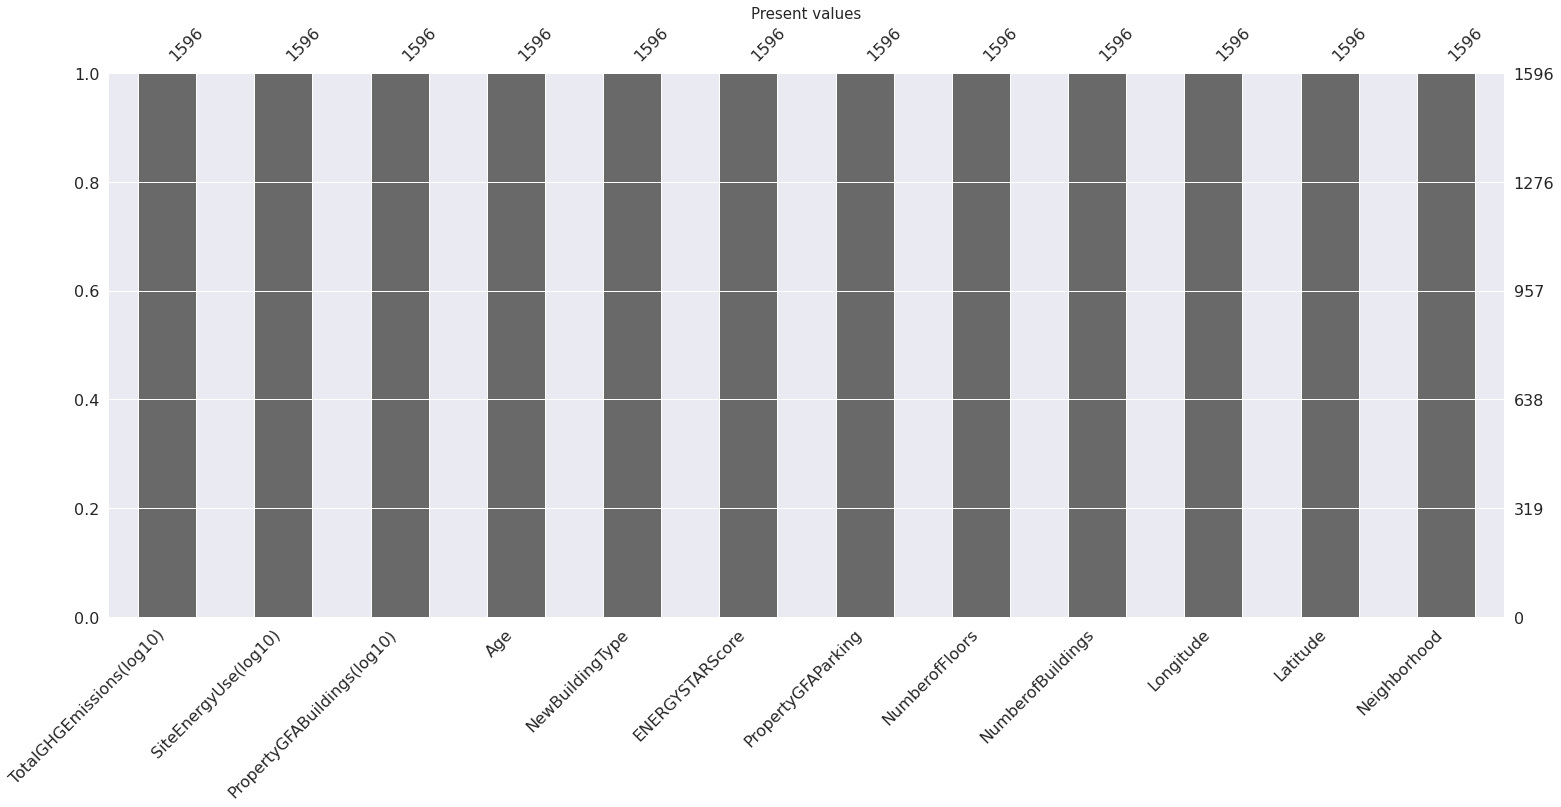

In [94]:
barchart = msno.bar(build_df, sort="descending")
barchart.set_title("Present values", fontsize=15)
plt.show()

There are no missing values remaining.

# One hot encoding

As machine learning algoritm doesnt work with categorical variables, we use the Scikit-Learn’s OneHotEncoder class to one-hot encode theses variables.

Create new dummies variables for each category of the variables *Neighborhood* and *NewBuildingType*.

In [95]:
# Create new dataframe with encoded variables
encoded_df = pd.get_dummies(build_df, prefix=[nbhd_col, 'BuildType'], columns=[nbhd_col, new_type_col])

display(encoded_df.sample(10))

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10),TotalGHGEmissions(log10),...,BuildType_Education,BuildType_Healthcare,BuildType_Hotel,BuildType_Industrial,BuildType_Office,BuildType_Other,BuildType_Religion,BuildType_Restaurant,BuildType_Services,BuildType_Stores
538,47.58241,-122.32866,1,2,0,16.000000,85,4.786751,6.691271,2.251930,...,0,0,0,1,0,0,0,0,0,0
3020,47.66506,-122.31656,1,3,0,50.333333,87,4.445729,6.307095,1.800854,...,0,0,0,0,0,1,0,0,0,0
2823,47.60742,-122.33919,1,20,0,3.000000,8,5.513904,7.771643,3.396161,...,0,0,1,0,0,0,0,0,0,0
1155,47.61109,-122.32721,1,3,0,25.500000,96,4.490955,6.450739,1.977037,...,0,0,0,0,0,1,0,0,0,0
2904,47.62164,-122.31238,1,2,0,84.000000,69,4.335578,6.206279,1.715084,...,0,0,0,0,0,0,0,0,0,0
494,47.53655,-122.36377,1,1,0,79.000000,11,4.976410,6.733807,1.976533,...,0,0,0,0,0,0,0,0,0,1
1666,47.53366,-122.33733,1,1,0,81.833333,53,4.366610,6.207394,1.719414,...,0,0,0,0,0,0,0,0,0,1
236,47.60249,-122.32854,1,13,52703,98.000000,10,5.504524,7.141257,2.334936,...,0,0,0,0,1,0,0,0,0,0
401,47.69267,-122.35506,1,1,7450,41.000000,13,4.705299,7.167768,2.617451,...,0,0,0,0,0,0,0,0,0,1
407,47.66517,-122.30186,1,3,42440,26.000000,10,4.777064,6.782671,1.691700,...,0,0,0,0,1,0,0,0,0,0


Reorder columns for more clarity.

In [96]:
# Reorder columns alphabetically 
encoded_df = encoded_df.reindex(sorted(encoded_df.columns), axis=1)

Check missing data after one hot encoding

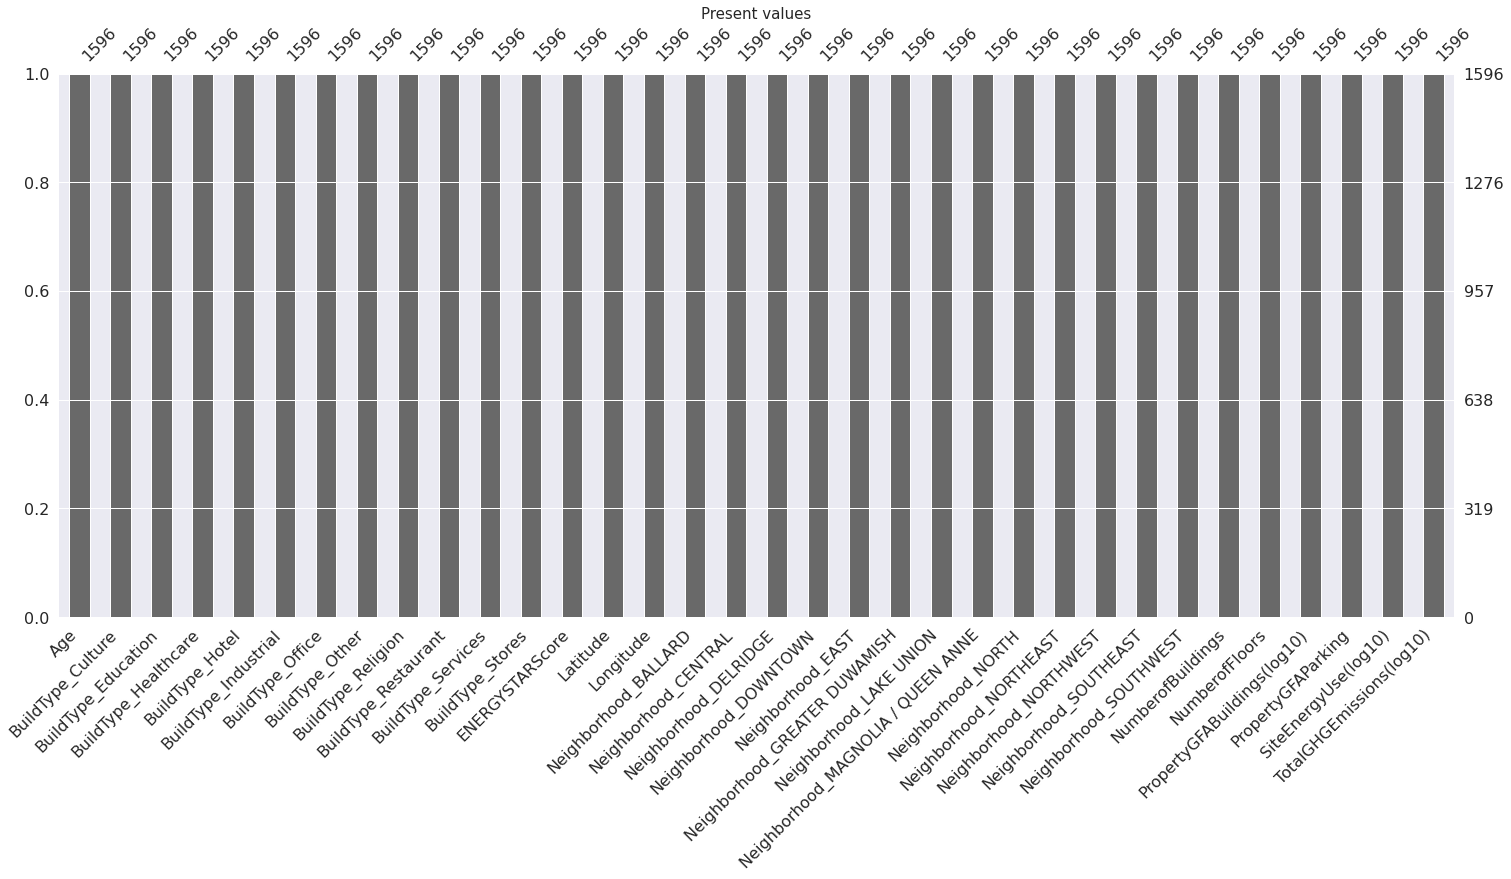

In [97]:
barchart = msno.bar(encoded_df)
barchart.set_title("Present values", fontsize=15)
plt.show()

# Export

In [98]:
export_df = encoded_df.copy()

Export cleaned dataframe to csv file : 

In [100]:
# File name
export_filename = "project4_data_cleaned.csv"

# File path
export_path = work_path + project_path + "/" + export_filename

# Export dataframe
export_df.to_csv(export_path, index=False)
